In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
dataset = load_boston()
x, t = dataset.data, dataset.target
columns = dataset.feature_names

C:\Users\kenta\anaconda3\envs\workspace\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [3]:
type(x),x.shape,type(t),t.shape

(numpy.ndarray, (506, 13), numpy.ndarray, (506,))

In [4]:
df=pd.DataFrame(x,columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# 目標値を追加
df['Target'] = t
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [6]:
# t に目標変数のみを格納 
t=df['Target'].values

#x　に入力変数のみを格納　
x=df.drop(labels=['Target'],axis=1).values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#学習用データとテスト用データに分割
x_train, x_test, t_train, t_test = \
train_test_split(x,t,test_size=0.3,random_state=0)

In [9]:
# Step 1：モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
# Step 2：モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [11]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [12]:
model.intercept_

37.937107741831994

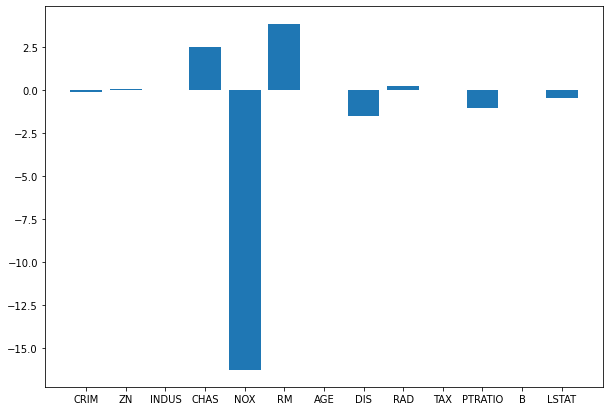

In [13]:
# パラメータの分布をヒストグラムで可視化
plt.figure(figsize=(10,7))
plt.bar(x=columns,height=model.coef_);

In [14]:
# Step 3：モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7645451026942549
test score :  0.6733825506400202


In [17]:
# 推論
y = model.predict(x_test)
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  24.935707898576652
目標値:  22.6


In [16]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  24.935707898576652
目標値:  22.6


In [18]:
# モデルの定義、ハイパーパラメータの値を設定
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

In [19]:
# モデルの学習
ridge.fit(x_train, t_train)

Ridge(alpha=1)

In [20]:
# モデルの検証
print('train score : ', ridge.score(x_train, t_train))
print('test score : ', ridge.score(x_test, t_test))

train score :  0.7623440182689594
test score :  0.6665819091486687


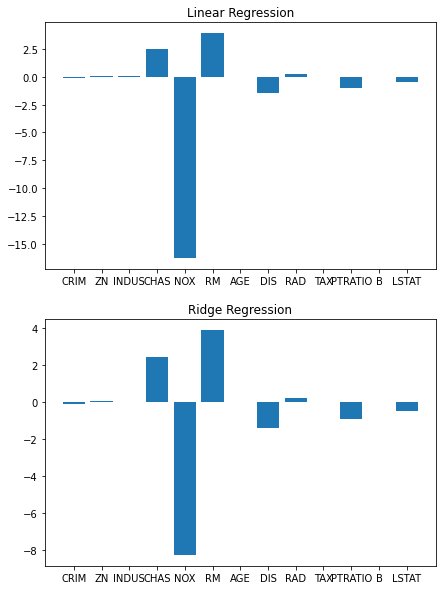

In [21]:
# 箱を準備
fig = plt.figure(figsize=(7, 10))

# 重回帰分析
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# リッジ回帰
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x=columns, height=ridge.coef_)
ax2.set_title('Ridge Regression');

In [22]:
# モデルの定義
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)

In [23]:
# モデルの学習
lasso.fit(x_train, t_train)

Lasso(alpha=1)

In [24]:
# モデルの検証
print('train score : ', lasso.score(x_train, t_train))
print('test score : ', lasso.score(x_test, t_test))

train score :  0.7084095500978868
test score :  0.6115433359595555


In [25]:
# 0 になっていない特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso の特徴量 : ', np.sum(lasso.coef_ != 0))

元の特徴量の数 :  13
Lasso の特徴量 :  10


In [26]:
# アルファを変更してみる
lasso_005 = Lasso(alpha=0.05)
lasso_005.fit(x_train, t_train)

print('train score : ', lasso_005.score(x_train, t_train))
print('test score : ', lasso_005.score(x_test, t_test))

train score :  0.7548928631432029
test score :  0.6541502573235292


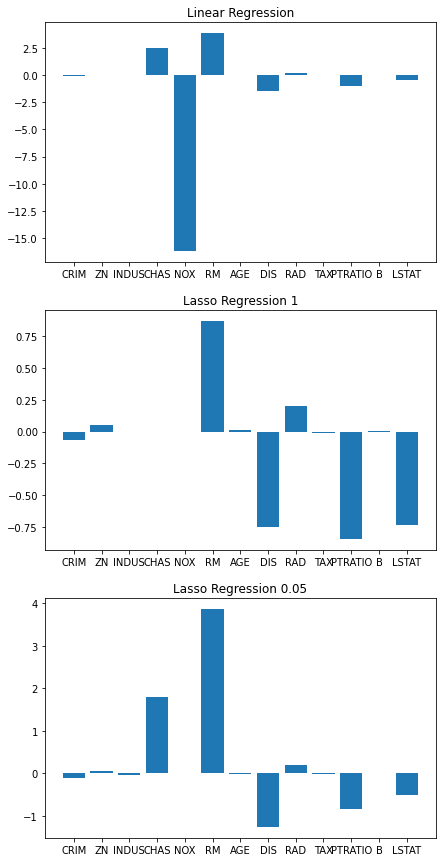

In [27]:
fig = plt.figure(figsize=(7, 15))

# 重回帰分析
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# lasso
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x=columns, height=lasso.coef_)
ax2.set_title('Lasso Regression 1')

# lasso_005
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x=columns, height=lasso_005.coef_)
ax3.set_title('Lasso Regression 0.05');

In [28]:
from google.colab import files
uploaded = files.upload()

      
# データの確認
df = pd.read_csv('regression_pls.csv')
df.head()

ModuleNotFoundError: No module named 'google'

In [ ]:
df.shape

In [ ]:
# データの切り分け -> ndarray に変換
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

In [ ]:
x_train, x_test, t_train, t_test =\
train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# モデルの学習
model.fit(x_train, t_train)

In [ ]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

In [ ]:
# 相関係数の算出
df_corr = df.corr()
df_corr.head()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.iloc[:20, :20], annot=True);

In [ ]:
sns.jointplot(x='x1', y='x16', data=df);

In [ ]:
# モデルの定義（ n_components:7 とする）
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=7)

In [ ]:
# モデルの学習
pls.fit(x_train, t_train)

In [ ]:
# モデルの検証
print('train score : ', pls.score(x_train, t_train))
print('test score : ', pls.score(x_test, t_test))